### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, classification_report

### EDA and Data Preprocessing

In [2]:
# Function to clean tweet text
def clean_text(text):
    text = str(text) if text is not None else '' # Convert to string, handle None
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Function to generate a word cloud
def generate_wordcloud(data):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Function to plot sentiment distribution
def plot_sentiment_distribution(df, title):
    sentiment_count = df['sentiment'].value_counts()
    plt.figure(figsize=(6, 4))
    sentiment_count.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    plt.show()

### Load datasets

In [3]:
# Train
train_df = pd.read_csv('tweettrain.csv')
train_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [4]:
# Test
test_df = pd.read_csv('tweettest.csv')
test_df

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [5]:
# Clean text data
train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)


Word Cloud for Positive Sentiment:


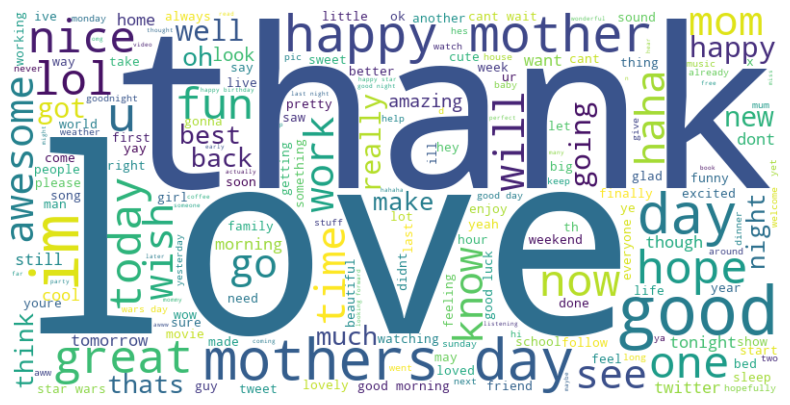

In [6]:
# Filter text based on sentiment
positive_text = train_df[train_df['sentiment'] == 'positive']['text']
negative_text = train_df[train_df['sentiment'] == 'negative']['text']
neutral_text = train_df[train_df['sentiment'] == 'neutral']['text']

# Generate word clouds for each sentiment
print("\nWord Cloud for Positive Sentiment:")
generate_wordcloud(positive_text)


Word Cloud for Negative Sentiment:


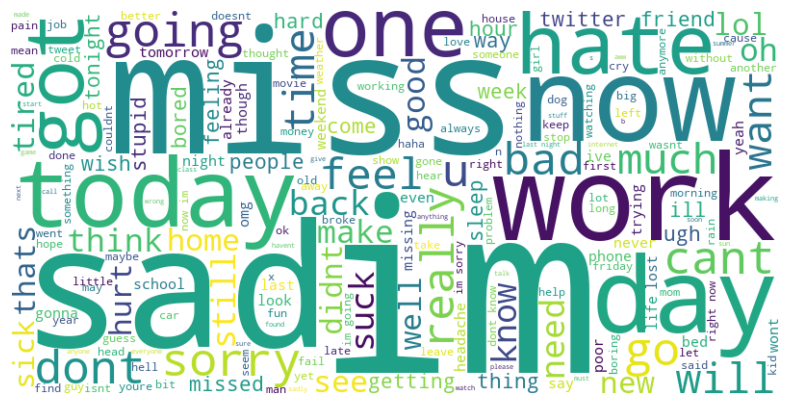

In [7]:
print("\nWord Cloud for Negative Sentiment:")
generate_wordcloud(negative_text)


Word Cloud for Neutral Sentiment:


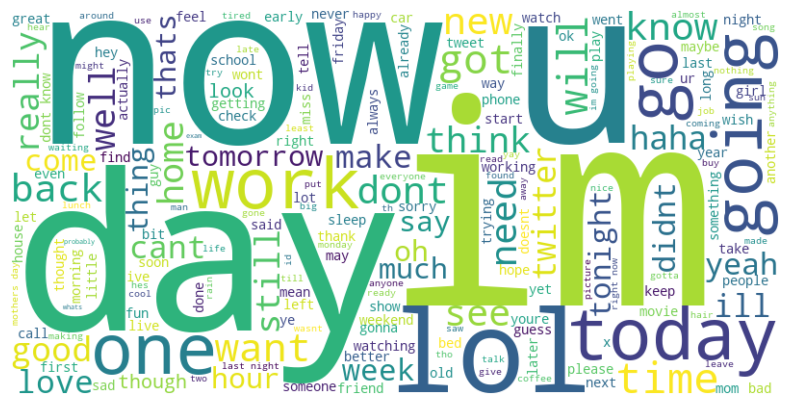

In [8]:
print("\nWord Cloud for Neutral Sentiment:")
generate_wordcloud(neutral_text)


Sentiment Distribution in Training Data:


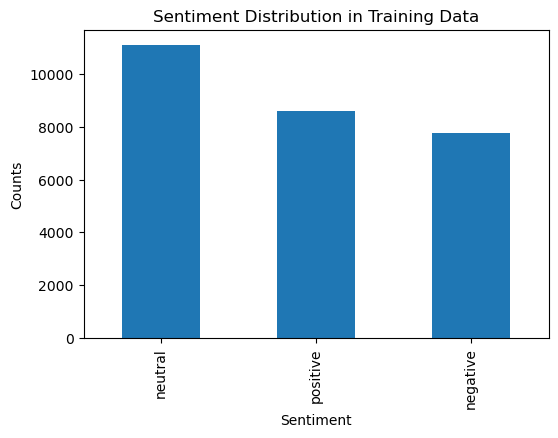

In [9]:
# Sentiment Distribution in Training Data
print("\nSentiment Distribution in Training Data:")
plot_sentiment_distribution(train_df, 'Sentiment Distribution in Training Data')


Sentiment Distribution in Test Data:


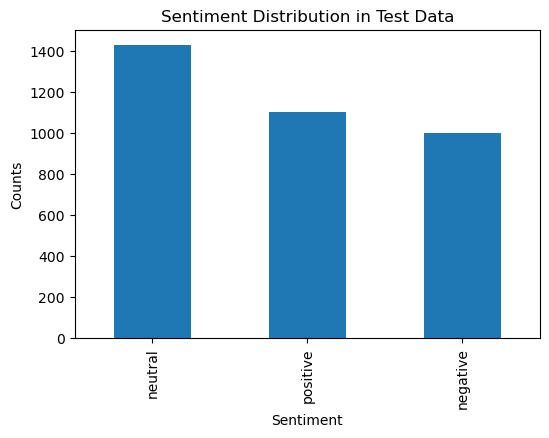

In [10]:
# Sentiment Distribution in Test Data
print("\nSentiment Distribution in Test Data:")
plot_sentiment_distribution(test_df, 'Sentiment Distribution in Test Data')

In [11]:
# Encode labels
label_encoder = LabelEncoder()
train_df['labels'] = label_encoder.fit_transform(train_df['sentiment'])
test_df['labels'] = label_encoder.transform(test_df['sentiment'])

In [12]:
# Define RoBERTa Tokenizer and Model
tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base')
model = RobertaForSequenceClassification.from_pretrained('distilroberta-base', num_labels=3)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

C:\Users\achan\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\achan\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Build the RoBERTa model

In [13]:
# Custom Dataset class for RoBERTa
class TweetDataset(Dataset):
    def __init__(self, tweets, labels, tokenizer, max_len):
        self.tweets = tweets
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, item):
        tweet = str(self.tweets[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'tweet_text': tweet,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [14]:
# Hyperparameters
MAX_LEN = 128
BATCH_SIZE = 16

# Create datasets
train_dataset = TweetDataset(
    tweets=train_df.text.to_numpy(),
    labels=train_df.labels.to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

test_dataset = TweetDataset(
    tweets=test_df.text.to_numpy(),
    labels=test_df.labels.to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,  # Reduced number of epochs for faster training
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

In [15]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

Step,Training Loss
10,1.074100
20,1.098600
30,1.074000
40,1.096800
50,1.106800
60,1.076600
70,1.079500
80,1.078300
90,1.057600
100,1.074200


TrainOutput(global_step=1718, training_loss=0.6497317470688204, metrics={'train_runtime': 2820.0604, 'train_samples_per_second': 9.745, 'train_steps_per_second': 0.609, 'total_flos': 910100375675136.0, 'train_loss': 0.6497317470688204, 'epoch': 1.0})

In [16]:
# Make predictions on the test set
predictions = trainer.predict(test_dataset)

In [17]:
# Get the predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=-1)

### Evaluate the Model

In [18]:
# Calculate the accuracy
accuracy = accuracy_score(test_df['labels'], predicted_labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.77985285795133


In [19]:
# Generate the classification report
report = classification_report(test_df['labels'], predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.82      0.79      1001
     neutral       0.74      0.74      0.74      1430
    positive       0.86      0.79      0.82      1103

    accuracy                           0.78      3534
   macro avg       0.79      0.78      0.78      3534
weighted avg       0.78      0.78      0.78      3534

